<a href="https://colab.research.google.com/github/gtsagkatakis/Data-Science-and-Applications-2025/blob/main/485%5B2025%5D_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classifying MNIST using Multi-Layer Perceptron (MLP)

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#Build an MLP model

In [12]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#Compile the model, choose optimizer, loss and metrics

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Train the model and save the history. Define epochs, batch_size and validation_split

In [14]:
history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8523 - loss: 0.5198 - val_accuracy: 0.9557 - val_loss: 0.1541
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9616 - loss: 0.1383 - val_accuracy: 0.9658 - val_loss: 0.1136
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9759 - loss: 0.0826 - val_accuracy: 0.9722 - val_loss: 0.0905
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9836 - loss: 0.0580 - val_accuracy: 0.9707 - val_loss: 0.0937
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9892 - loss: 0.0383 - val_accuracy: 0.9740 - val_loss: 0.0878
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9917 - loss: 0.0313 - val_accuracy: 0.9770 - val_loss: 0.0752
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9948 - loss: 0.0220 - val_accuracy: 0.9773 - val_loss: 0.0747
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9962 - loss: 0.0162 - val_accu

#Plot training & validation accuracy values and loss values per epoch

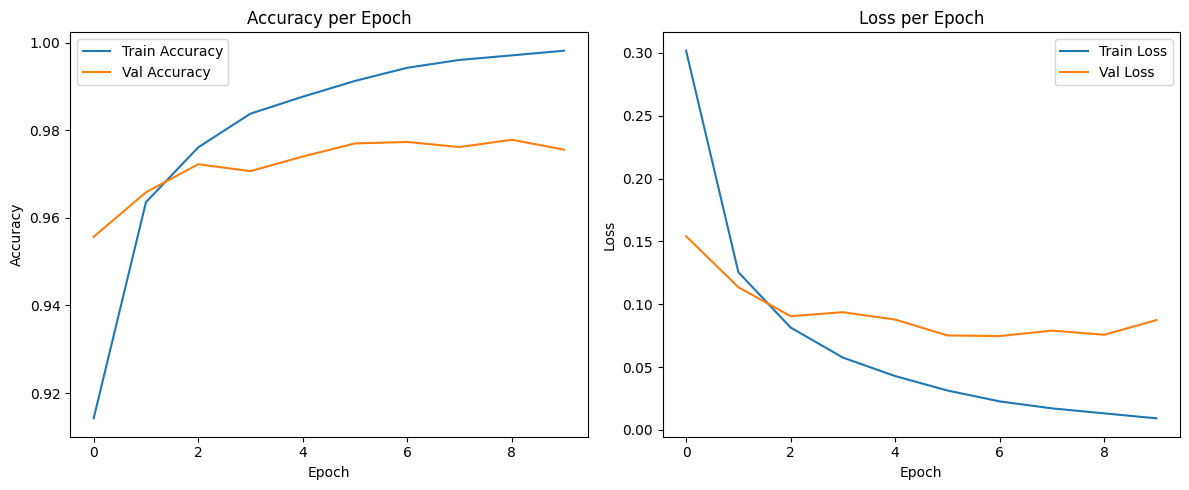

In [15]:
# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#Evaluate the model on the test set and report test accuracy

In [16]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 0.9764
Test Loss: 0.0794


#Explore the impact of different hyper-parameters e.g. number of hidden layers on training and testing performance

In [17]:
# Define a new model with two hidden layers
model_deep = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),  # Νέο δεύτερο κρυφό layer
    layers.Dense(10, activation='softmax')
])

# Compile
model_deep.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Train
history_deep = model_deep.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=0  # Απόφυγε υπερβολικό output
)

# Evaluate
test_loss_deep, test_acc_deep = model_deep.evaluate(test_images, test_labels, verbose=0)
print(f"Test Accuracy with 2 hidden layers: {test_acc_deep:.4f}")


Test Accuracy with 2 hidden layers: 0.9799


#Explore the impact of training set size on training and testing performance (keep the same testing set while varying the training set)

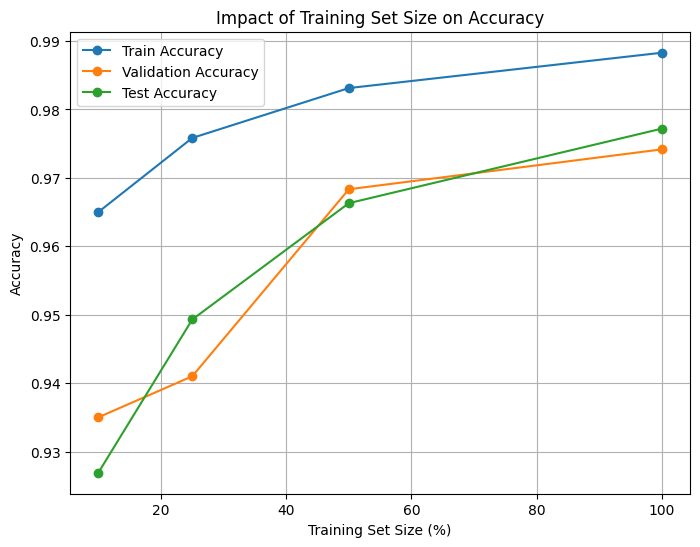

In [18]:
import numpy as np

train_sizes = [0.1, 0.25, 0.5, 1.0]
train_accs = []
val_accs = []
test_accs = []

for size in train_sizes:
    # Υποσύνολο του training set
    num_samples = int(len(train_images) * size)
    x_subset = train_images[:num_samples]
    y_subset = train_labels[:num_samples]
    
    # Νέο μοντέλο για κάθε περίπτωση
    model_temp = models.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    model_temp.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
    
    history_temp = model_temp.fit(
        x_subset, y_subset,
        epochs=5,
        batch_size=128,
        validation_split=0.2,
        verbose=0
    )
    
    train_acc = history_temp.history['accuracy'][-1]
    val_acc = history_temp.history['val_accuracy'][-1]
    test_loss, test_acc = model_temp.evaluate(test_images, test_labels, verbose=0)
    
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    test_accs.append(test_acc)

# Plotting
plt.figure(figsize=(8,6))
plt.plot(np.array(train_sizes)*100, train_accs, marker='o', label='Train Accuracy')
plt.plot(np.array(train_sizes)*100, val_accs, marker='o', label='Validation Accuracy')
plt.plot(np.array(train_sizes)*100, test_accs, marker='o', label='Test Accuracy')

plt.title('Impact of Training Set Size on Accuracy')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()